## Creating a bigger dataset with Scikit
You can adjust the number of examples (which Scikit calls samples) by changing the `n_samples` parameter in `datasets.make_regression`.

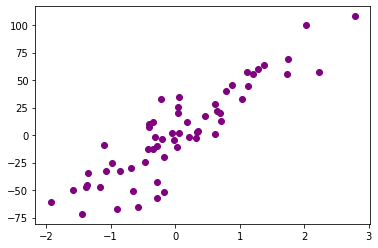

In [54]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_regression(
n_samples=300, n_features=1, noise=20, random_state=4
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

plt.scatter(X_test, y_test,  color='purple')
plt.show()

## Writing the same class, with a few changes
Scikit generates X as a list of lists instead of a single list of numbers, like we had in the lesson's example. We're breezing past this stuff for now, but will cover it thoroughly in the linear algebra chapter soon to come. Relevant areas have been commented in the code below.

In [65]:
 # just setting up the same constructor we used in the lesson
class LinearRegression:

  def __init__(self, learning_rate, epochs):
    self.lr = learning_rate
    self.epochs = epochs

  def train(self, X, y):
    m, n_features = X.shape # here we destructure the example count and number of features from the tuple returned by X.shape
    self.w = np.zeros(n_features) # now that we expect multiple features, we create an array with n zeroes where n is the number of features
    self.b = 0

    for i in range(self.epochs):
      y_predicted = np.dot(X, self.w) + self.b # the next two lines rely on linear algebra
      dw = (1/m) * np.dot(X.T,(y_predicted - y)) # we're ignoring their changes for now!
      db = (1/m) * np.sum(y_predicted - y)
      self.w -= self.lr * dw
      self.b -= self.lr * db

  def predict(self, X):
    y_predicted = self.w * X + self.b
    return y_predicted

## Watch the model learn
Here we've written a simple for loop that will show you the model adjusting its parameters over time. Try experimenting with different epochs and learning rates. As of right now, our model doesn't converge on a very good set of parameters. Can you do better?

[0.] 0


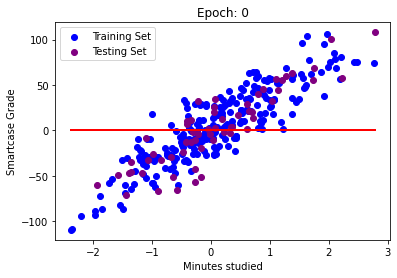

[14.40518046] 1.5935343836819404


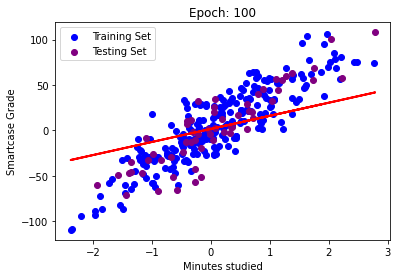

[23.09893401] 2.1843642396885268


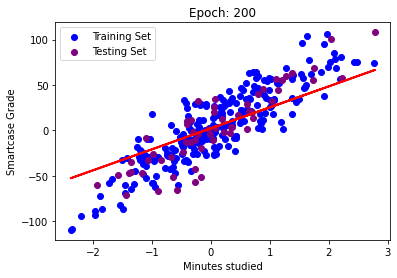

[28.35541609] 2.316057513037995


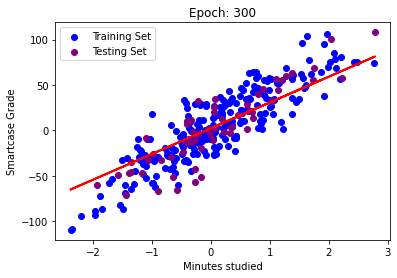

[31.53950654] 2.2589331435227633


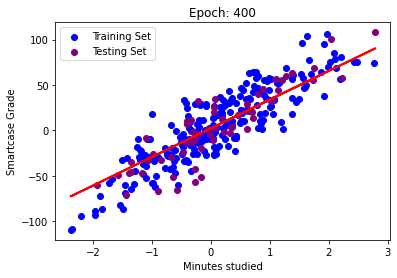

[33.47182233] 2.1413262522073717


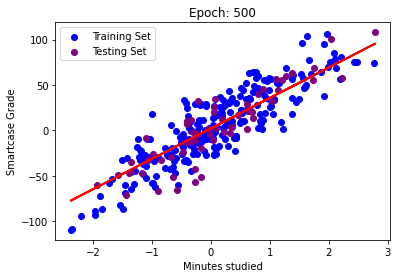

[34.64664005] 2.019666012764447


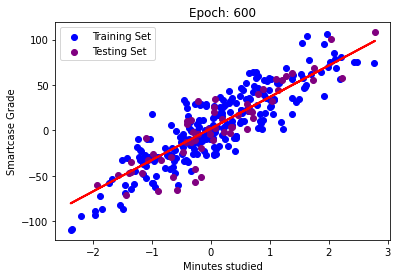

In [62]:
def graph_data(iteration):
  plt.scatter(X_train, y_train, color="blue", label="Training Set")
  plt.scatter(X_test, y_test, color="purple", label="Testing Set")
  plt.title(iteration)
  plt.legend()
  plt.xlabel("Minutes studied")
  plt.ylabel("Smartcase Grade")

for i in range(7):
  regressor = LinearRegression(.005, epochs = i * 100)
  regressor.train(X_train, y_train)
  predicted = regressor.predict(X_test)
  y_pred_line = regressor.predict(X)
  graph_data(f"Epoch: {i * 100}")
  plt.plot(X, y_pred_line, color="red", linewidth=2, label="Prediction")
  print(regressor.w, regressor.b)
  plt.show()